In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("C:/Users/Blue Star Computer/Downloads/Sample_Superstore.xlsx")

In [4]:
# First five rows
df.head()

,A`,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,4962,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,98103.0,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801
1,4963,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,98103.0,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644
2,4964,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,98103.0,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588
3,8223,CA-2016-152905,2016-02-18,2016-02-24,Standard Class,AB-10015,Aaron Bergman,Consumer,United States,Arlington,...,76017.0,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248
4,8802,CA-2018-140935,2018-11-10,2018-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,...,73120.0,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544


# EDA (Exploratory Data Analysis)

In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   A`              9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [7]:
df.describe()

,A`,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2018-04-30 10:03:51.979187712,2018-05-04 09:03:29.645787392,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2016-01-03 00:00:00,2016-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2017-05-23 00:00:00,2017-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2018-06-26 00:00:00,2018-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2019-05-14 00:00:00,2019-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2019-12-30 00:00:00,2020-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


In [9]:
df.isnull().sum()

A`                 0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

we have find 

-> rows, columns

-> data types

-> check missing value 

# Business Question

1. which region has highest sales?

2. which category gives most profit?

3. which states are causing losses?

4. what is the monthly sales trend?

**Question 1: region wise highest sales**


In [11]:
region_sales = df.groupby('Region')['Sales'].sum().sort_value(ascending=False)

In [12]:
region_sales

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [17]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

**Plot**

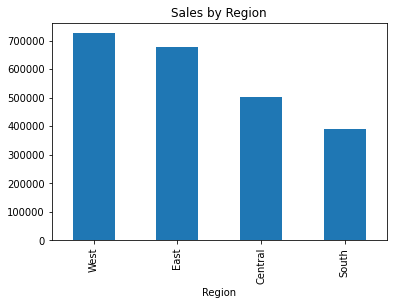

In [18]:
region_sales.plot(kind='bar',title='Sales by Region')
plt.show()

**Question 2: Category and profit Analysis**

In [20]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

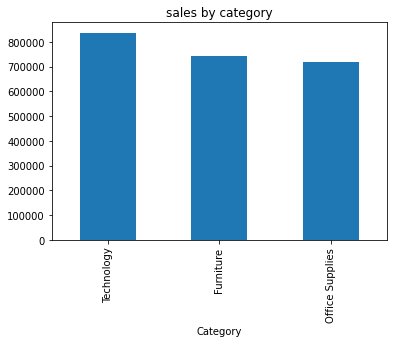

In [21]:
category_summery.plot(kind='bar',title='sales by category')
plt.show()

In [24]:
category_summery = df.groupby('Category')[['Sales','Profit']].sum()
category_summery

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


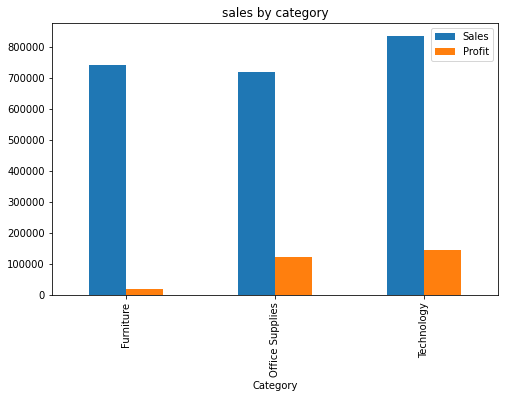

In [26]:
category_summery.plot(kind='bar',figsize=(8,5),title='sales by category')
plt.show()

**NOTE**
1. category Technology is more profitable

2. Furniture category has lower profit margin 


In [38]:
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
sub_category_summery

,Profit,Sales
Sub-Category,,
Accessories,41936.6357,167380.3180
Appliances,18138.0054,107532.1610
Art,6527.7870,27118.7920
Binders,30221.7633,203412.7330
Bookcases,-3472.5560,114879.9963
Chairs,26590.1663,328449.1030
Copiers,55617.8249,149528.0300
Envelopes,6964.1767,16476.4020
Fasteners,949.5182,3024.2800


In [37]:

sub_category_summery = df.groupby('Sub-Category')[['Profit','Sales']].sum()
sub_category_summery

,Profit,Sales
Sub-Category,,
Accessories,41936.6357,167380.3180
Appliances,18138.0054,107532.1610
Art,6527.7870,27118.7920
Binders,30221.7633,203412.7330
Bookcases,-3472.5560,114879.9963
Chairs,26590.1663,328449.1030
Copiers,55617.8249,149528.0300
Envelopes,6964.1767,16476.4020
Fasteners,949.5182,3024.2800


**insights**
1. loss sub-category have Tables and Bookcases Supplies

2. profit sub-category have the Copiers

3. high sales donot gurentee high profit

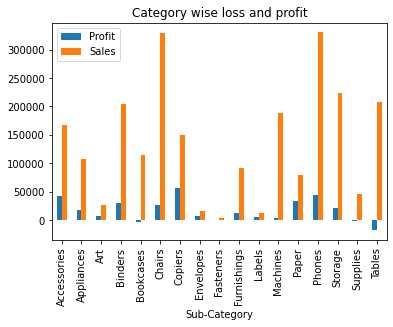

In [39]:
sub_category_summery.plot(kind='bar',title='Category wise loss and profit')
plt.show()

In [42]:
state_profit = df.groupby('State')['Profit'].sum().sort_values()
state_profit

State
Texas                  -25729.3563
Ohio                   -16971.3766
Pennsylvania           -15559.9603
Illinois               -12607.8870
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1190.4705
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

# Loss making state

In [43]:
state_summary = df.groupby('State')[['Profit','Sales']].sum()
state_summary

,Profit,Sales
State,,
Alabama,5786.8253,19510.6400
Arizona,-3427.9246,35282.0010
Arkansas,4008.6871,11678.1300
California,76381.3871,457687.6315
Colorado,-6527.8579,32108.1180
Connecticut,3511.4918,13384.3570
Delaware,9977.3748,27451.0690
District of Columbia,1059.5893,2865.0200
Florida,-3399.3017,89473.7080


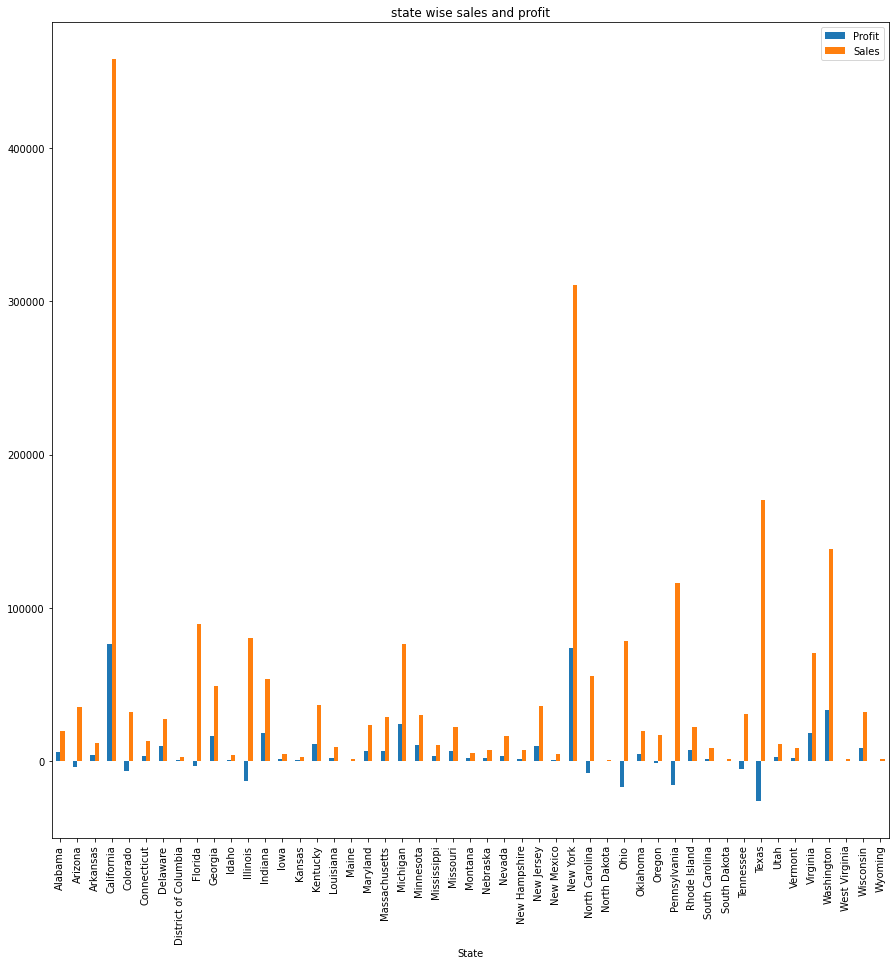

In [46]:
state_summary.plot(kind='bar',figsize=(15,15),title='state wise sales and profit')
plt.show()

Texas                  -25729.3563

Ohio                   -16971.3766

Pennsylvania           -15559.9603

Illinois               -12607.8870

North Carolina          -7490.9122

Colorado                -6527.8579

Tennessee               -5341.6936

Arizona                 -3427.9246

Florida                 -3399.301

Oregon                  -1190.4705


company to needs these states improve the strategies                  

# sales vs profit Relationship

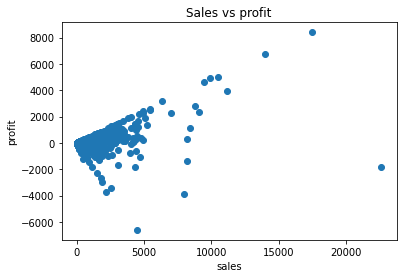

In [51]:
plt.figure(figsize=(6,4))
plt.scatter(df['Sales'],df['Profit'])
plt.title('Sales vs profit')
plt.xlabel('sales')
plt.ylabel('profit')
plt.show()

**observation**
1. Always high sales have not high profit

2. profit profit because add the discount 

# next preview 
1. Date column handling 
2. Monthly sales trend
3. year wise growth
4. final dashboard ready insight

In [52]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [53]:
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


**Create new column (year & month)**

In [56]:
df['Year']=df['Order Date'].dt.year
df['Month']=df['Order Date'].dt.month

**Monthly sales trend**

In [64]:
monthly_sales = df.groupby(['Year','Month'])['Sales'].sum().reset_index()
monthly_sales

,Year,Month,Sales
0,2016,1,14236.8950
1,2016,2,4519.8920
2,2016,3,55691.0090
3,2016,4,28295.3450
4,2016,5,23648.2870
5,2016,6,34595.1276
6,2016,7,33946.3930
7,2016,8,27909.4685
8,2016,9,81777.3508
9,2016,10,31453.3930


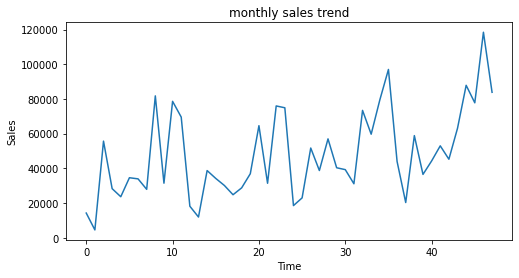

In [65]:
plt.figure(figsize=(8,4))
plt.plot(monthly_sales['Sales'])
plt.title("monthly sales trend")
plt.xlabel("Time")
plt.ylabel('Sales')
plt.show()

In [66]:
yearly_summery = df.groupby('year')[['Sales','Profit']].sum()
yearly_summery

,Sales,Profit
year,,
2016,484247.4981,49543.9741
2017,470532.5090,61618.6037
2018,609205.5980,81795.1743
2019,733215.2552,93439.2696


<Figure size 576x360 with 0 Axes>

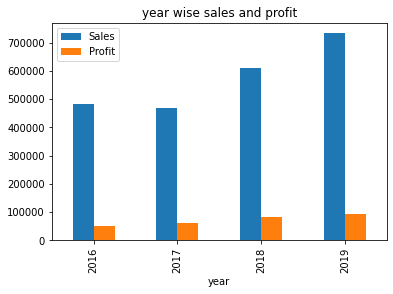

In [67]:
plt.figure(figsize=(8,5))
yearly_summery.plot(kind='bar',title='year wise sales and profit')
plt.show()

In [72]:
best_month=monthly_sales.loc[monthly_sales['Sales'].idxmax()]
best_month

Year       2019.000
Month        11.000
Sales    118447.825
Name: 46, dtype: float64

In [74]:
worst_sales = monthly_sales.loc[monthly_sales['Sales'].idxmin()]
worst_sales

Year     2016.000
Month       2.000
Sales    4519.892
Name: 1, dtype: float64

# Next preview
Discount vs Profit Analysis

Final Insights



**Discount vs Profit**

In [75]:
Discount_profit = df.groupby('Discount')['Profit'].mean()

In [76]:
Discount_profit

Discount
0.00     66.900292
0.10     96.055074
0.15     27.288298
0.20     24.702572
0.30    -45.679636
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
0.70    -95.874060
0.80   -101.796797
Name: Profit, dtype: float64

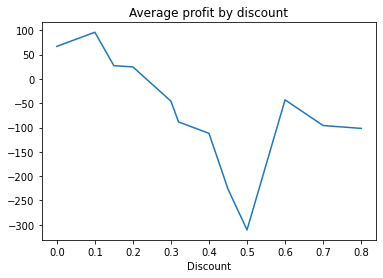

In [77]:
Discount_profit.plot(kind='line',title='Average profit by discount')
plt.show()

Higher discount=lower profit

some discount loss on the level